In [8]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import fma_modules.utils as fma_utils


In [9]:
def read_files(directory):
    files = []
    for file in os.listdir(directory):
        path = os.path.join(directory, file)
        y, sr = librosa.load(path)
        files.append((file, y, sr))
    return files

In [10]:
DATA_PATH = "project_data_source/free_music_archive/fma_small/001"
#song = fma_utils.load(DATA_PATH + '001039.mp3')
song = "project_data_source/free_music_archive/fma_small/001/001039.mp3"

In [11]:
y, sr = librosa.load(song)

def calc_features(y, sr):
    y, _ = librosa.effects.trim(y)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroids_delta = librosa.feature.delta(spectral_centroids)
    spectral_centroids_accelerate = librosa.feature.delta(spectral_centroids, order=2)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y,sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    
    spectral_centroids_mean = np.mean(spectral_centroids)
    spectral_centroids_delta_mean = np.mean(spectral_centroids_delta)
    spectral_centroids_accelerate_mean = np.mean(spectral_centroids_accelerate)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)
    spectral_rolloff_mean = np.mean(spectral_rolloff)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate) 
    rms_mean = np.mean(rms) 
    chroma_stft_mean = np.mean(chroma_stft)
    
    return spectral_centroids_mean, spectral_centroids_delta_mean, spectral_centroids_accelerate_mean, spectral_bandwidth_mean,spectral_rolloff_mean, zero_crossing_rate_mean,rms_mean, chroma_stft_mean
    
    
calc_features(y, sr)

(2259.2244579671465,
 0.5579229289832527,
 -0.4056371028254535,
 2284.0718907963037,
 4556.524190156613,
 0.10049856881777691,
 0.2724961,
 0.56794655)

[Text(0.5, 1.0, 'log Power spectrogram')]

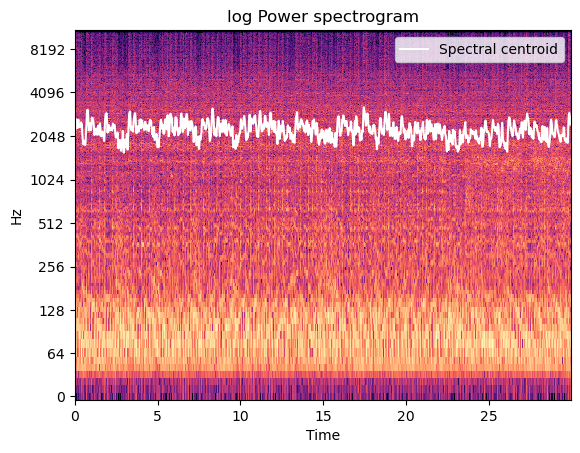

In [14]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
times = librosa.times_like(spectral_centroids)
fig, ax = plt.subplots()
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, spectral_centroids.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

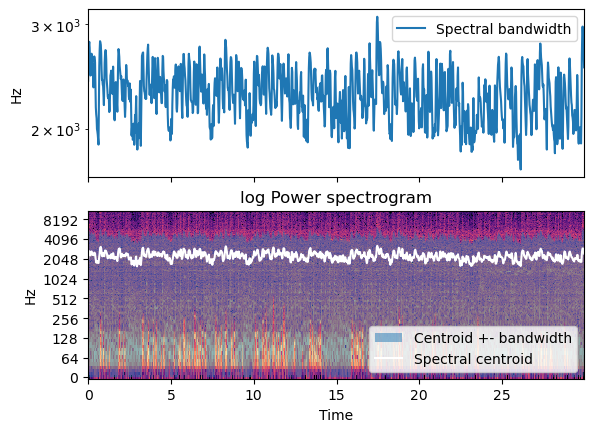

In [15]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y,sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spectral_bandwidth)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spectral_bandwidth[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spectral_bandwidth[0]),
                np.minimum(centroid[0] + spectral_bandwidth[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

In [16]:
df = pd.DataFrame(read_files('project_data_source/free_music_archive/fma_small/001'))
df.columns =['song name', 'y', 'sr']

In [17]:
lis = read_files("project_data_source/free_music_archive/fma_small/001")

In [18]:
features = [calc_features(item[1], item[2]) for item in lis]
features_df = pd.DataFrame(features)
features_df.columns = ['spectral_centroids_mean' , 'spectral_centroids_delta_mean',
                      'spectral_centroids_accelerate_mean', 'spectral_bandwidth_mean', 
                      'spectral_rolloff_mean', 'zero_crossing_rate_mean', 'rms_mean', 'chroma_stft_mean']

In [ ]:
pd.concat([df, features_df], axis=1)